In [102]:
# !kaggle competitions download -c competitive-data-science-predict-future-sales

In [103]:
# from zipfile import ZipFile

In [104]:
# with ZipFile('competitive-data-science-predict-future-sales.zip', 'r') as zipObj:
#     zipObj.extractall()

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
sns.set_theme()

In [107]:
train_df = pd.read_csv('./sales_train.csv')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [108]:
train_df['date'] = pd.to_datetime(train_df['date'])

# EDA

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [110]:
train_df.describe(include=np.number)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [111]:
train_df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [112]:
train_df.shape

(2935849, 6)

In [113]:
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-09-10,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [114]:
pd.get_dummies(train_df, columns=['shop_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 65 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   item_id         int64         
 3   item_price      float64       
 4   item_cnt_day    float64       
 5   shop_id_0       uint8         
 6   shop_id_1       uint8         
 7   shop_id_2       uint8         
 8   shop_id_3       uint8         
 9   shop_id_4       uint8         
 10  shop_id_5       uint8         
 11  shop_id_6       uint8         
 12  shop_id_7       uint8         
 13  shop_id_8       uint8         
 14  shop_id_9       uint8         
 15  shop_id_10      uint8         
 16  shop_id_11      uint8         
 17  shop_id_12      uint8         
 18  shop_id_13      uint8         
 19  shop_id_14      uint8         
 20  shop_id_15      uint8         
 21  shop_id_16      uint8         
 22  shop_id_17      ui

In [115]:
items_df = pd.read_csv('./items.csv')
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [116]:
items_map = pd.Series(data=items_df['item_category_id'], index=items_df['item_id'])

In [117]:
train_df['item_id'].map(items_map)

0          37
1          58
2          58
3          58
4          56
           ..
2935844    55
2935845    55
2935846    55
2935847    57
2935848    55
Name: item_id, Length: 2935849, dtype: int64

<AxesSubplot:title={'center':'Count of sold item per day'}, xlabel='date'>

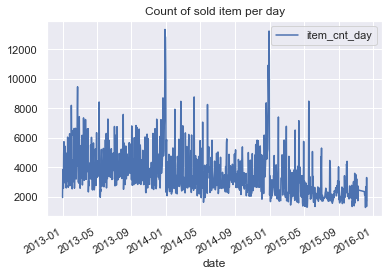

In [118]:
train_df.groupby(['date'])[['item_cnt_day']].sum().plot(title="Count of sold item per day")

In [119]:
train_df.groupby(['date'])[['item_cnt_day']].sum()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0
...,...
2015-12-06,2690.0
2015-12-07,2263.0
2015-12-08,1696.0


# Data preprocessing

In [120]:
def preprocess_data(df, test=False):
    df['item_id_category'] = df['item_id'].map(items_map)
    if test:
        df['date'] = '2015-12-11'
        df['date'] = pd.to_datetime(df['date'])
        df['date_block_num'] = 33
        df.drop(['ID'], inplace=True, axis=1)
    else:
        df.drop(['item_price'], inplace=True, axis=1)
    df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df.drop(['date'], inplace=True, axis=1)
    return df

In [121]:
train_df = preprocess_data(train_df)
train_df.head()

C:\Users\melni\AppData\Local\Temp/ipykernel_3868/1897649733.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,date_block_num,shop_id,item_id,item_cnt_day,item_id_category,day,week,month,dayofweek
0,0,59,22154,1.0,37,1,5,2,4
1,0,25,2552,1.0,58,1,9,3,4
2,0,25,2552,-1.0,58,1,18,5,2
3,0,25,2554,1.0,58,1,22,6,5
4,0,25,2555,1.0,56,15,3,1,1


In [132]:
train_df.shape

(2935849, 9)

In [127]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [128]:
test_id = test_df['ID']

In [129]:
test_df.shape

(214200, 3)

In [131]:
test_df = preprocess_data(test_df, test=True)
test_df.head()

C:\Users\melni\AppData\Local\Temp/ipykernel_3868/1897649733.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,shop_id,item_id,item_id_category,date_block_num,day,week,month,dayofweek
0,5,5037,19,33,11,50,12,4
1,5,5320,55,33,11,50,12,4
2,5,5233,19,33,11,50,12,4
3,5,5232,23,33,11,50,12,4
4,5,5268,20,33,11,50,12,4


In [133]:
test_df.shape

(214200, 8)